In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from datetime import datetime
import seaborn as sns

%matplotlib inline
warnings.simplefilter("ignore")

In [2]:
#load csv dataset by pandas
original_data = pd.read_csv("prosperLoanData.csv")
original_data.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Describe data
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Check data

In [4]:
original_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
original_data.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [6]:
original_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

The loan dataset consists of 113.937 rows and 81 columns, some of which include empty values. Term, ClosedDate, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, BorrowerState, and others have missing values.


Credit grade, loan status, borrow state, total prosper loans, verifiable income, income range, and debt per income ratio are the top seven features in which I'm interested.



Because my issue is what influences loan status, I believe that variables like borrow status, total prosper loans, verifiable income, income range, and debt to income ratio can have an effect on this variable.

## Cleaning data

In [7]:
# Choose necessary columns
col=['ListingKey', 'ListingCreationDate', 'CreditGrade', 
     'LoanStatus', 'BorrowerState', 'TotalProsperLoans', 
     'IncomeVerifiable', 'IncomeRange', 'DebtToIncomeRatio']
df_clean = original_data[col]
df_clean.head(5)

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,BorrowerState,TotalProsperLoans,IncomeVerifiable,IncomeRange,DebtToIncomeRatio
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,Completed,CO,NaN,True,"$25,000-49,999",0.17
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,Current,CO,NaN,True,"$50,000-74,999",0.18
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,Completed,GA,NaN,True,Not displayed,0.06
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,Current,GA,NaN,True,"$25,000-49,999",0.15
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,Current,MN,1.0,True,"$100,000+",0.26


In [8]:
# check the result
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           113937 non-null  object 
 1   ListingCreationDate  113937 non-null  object 
 2   CreditGrade          28953 non-null   object 
 3   LoanStatus           113937 non-null  object 
 4   BorrowerState        108422 non-null  object 
 5   TotalProsperLoans    22085 non-null   float64
 6   IncomeVerifiable     113937 non-null  bool   
 7   IncomeRange          113937 non-null  object 
 8   DebtToIncomeRatio    105383 non-null  float64
dtypes: bool(1), float64(2), object(6)
memory usage: 7.1+ MB


In [9]:
#rename columns name suitably
df_clean.columns = ['listing_key', 'listing_create_date', 'credit_grade', 
                    'loan_status', 'borrower_state', 'total_prosper_loans', 
                    'income_verifiable', 'income_range', 'debt_per_income']

In [10]:
# clean null values
df_clean['credit_grade']= np.where(df_clean['credit_grade'].isnull(), 'None', df_clean['credit_grade'])
df_clean['borrower_state']= np.where(df_clean['borrower_state'].isnull(), 'None', df_clean['borrower_state'])
df_clean['total_prosper_loans']= np.where(df_clean['total_prosper_loans'].isnull(), 0, df_clean['total_prosper_loans'])
df_clean['debt_per_income']= np.where(df_clean['debt_per_income'].isnull(), 0, df_clean['debt_per_income'])

In [11]:
#correct data type 
df_clean.listing_create_date = pd.to_datetime(df_clean['listing_create_date'].astype(str), infer_datetime_format=True, errors='coerce')

# id variable should be string
df_clean.listing_key = df_clean.listing_key.astype('str')

# convert credit_grade,loan_status to string values
df_clean.credit_grade = df_clean.credit_grade.astype('str')
df_clean.loan_status = df_clean.loan_status.astype('str')

# Replace Not employed values in income_range by Not displayed
df_clean.income_range = df_clean.income_range.replace({"Not employed":"Not displayed"})

In [12]:
# Check income_range column
df_clean.groupby('income_range').count()

,listing_key,listing_create_date,credit_grade,loan_status,borrower_state,total_prosper_loans,income_verifiable,debt_per_income
income_range,,,,,,,,
$0,621,621,621,621,621,621,621,621
"$1-24,999",7274,7274,7274,7274,7274,7274,7274,7274
"$100,000+",17337,17337,17337,17337,17337,17337,17337,17337
"$25,000-49,999",32192,32192,32192,32192,32192,32192,32192,32192
"$50,000-74,999",31050,31050,31050,31050,31050,31050,31050,31050
"$75,000-99,999",16916,16916,16916,16916,16916,16916,16916,16916
Not displayed,8547,8547,8547,8547,8547,8547,8547,8547


In [13]:
# Get current loan
df_history = df_clean.loc[df_clean['loan_status'] != 'Current']

In [14]:
def plot_plot(df, colx, coly, title, xlabel, ylabel):
    """
    visualize given dataframe.
    """
    df=df.sort_values(by=[colx])
    fig, ax = plt.subplots(figsize = (12,5), dpi = 110);
    sns.boxplot(x=colx, y=coly, data=df).set_ylim([0,0.8])
    ax.tick_params(axis='x', labelrotation=90)
    plt.title(title, fontweight='bold');
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

#### What is relation between loan status and debt per income ratio?

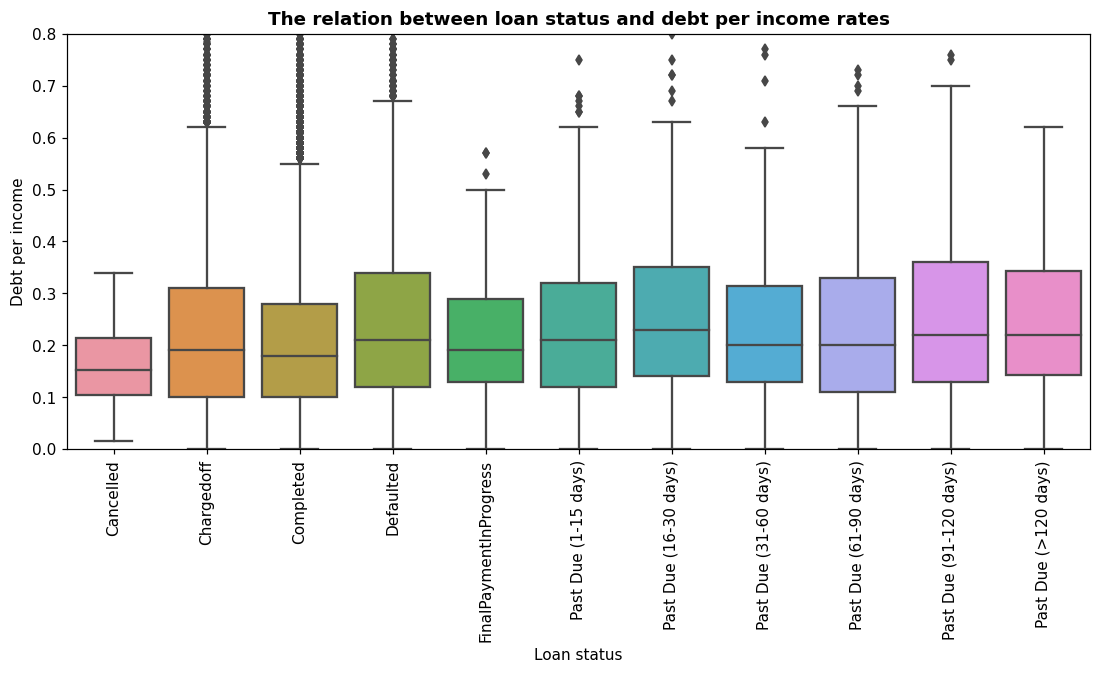

In [15]:
plot_plot(df_history, 'loan_status', 'debt_per_income', "The relation between loan status and debt per income rates", "Loan status", "Debt per income")

The cancelled status has the lowest mean of debt per income ratio, while the mean of completed status is just 0.18.

#### How is the relation between loan status, borrow status, debt per income and verifiable income?

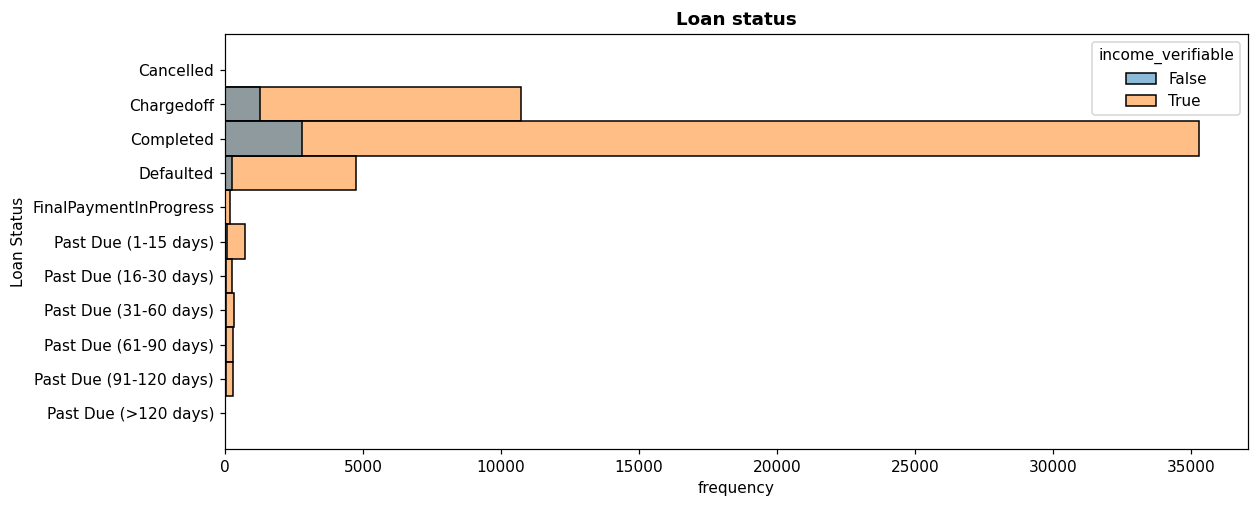

In [24]:
df_history=df_history.sort_values(by=['loan_status'])
fig, ax = plt.subplots(figsize = (12,5), dpi = 110);
sns.histplot(data=df_history, y=df_history['loan_status'],  hue='income_verifiable')
plt.title("Loan status", fontweight='bold');
plt.xlabel("frequency");
plt.ylabel("Loan Status");

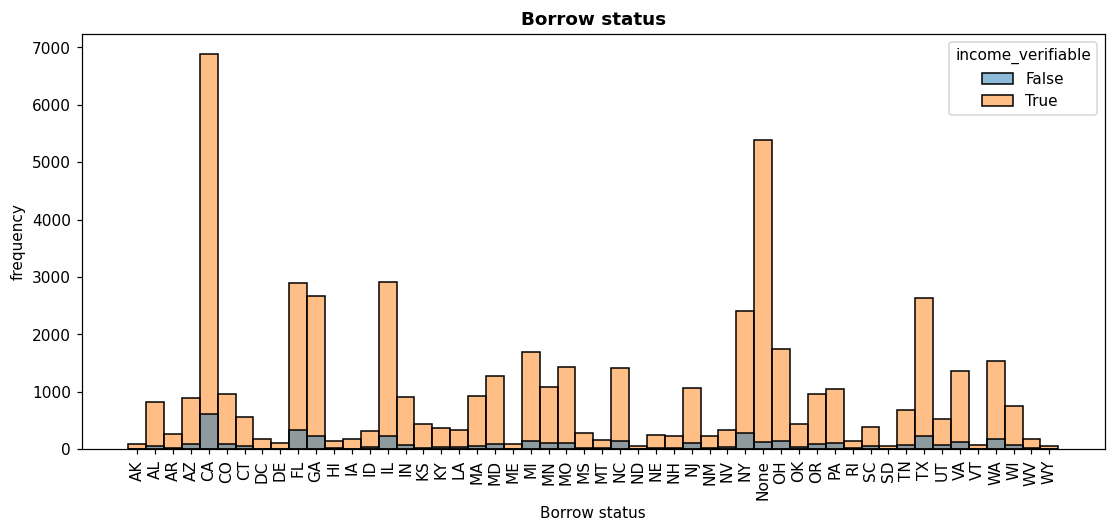

In [25]:
df_history=df_history.sort_values(by=['borrower_state'])
fig, ax = plt.subplots(figsize = (12,5), dpi = 110);
ax=sns.histplot(data=df_history, x=df_history['borrower_state'],  hue='income_verifiable')
plt.title("Borrow status", fontweight='bold');
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.tick_params(axis='x', labelrotation=90)
plt.xlabel("Borrow status");
plt.ylabel("frequency");

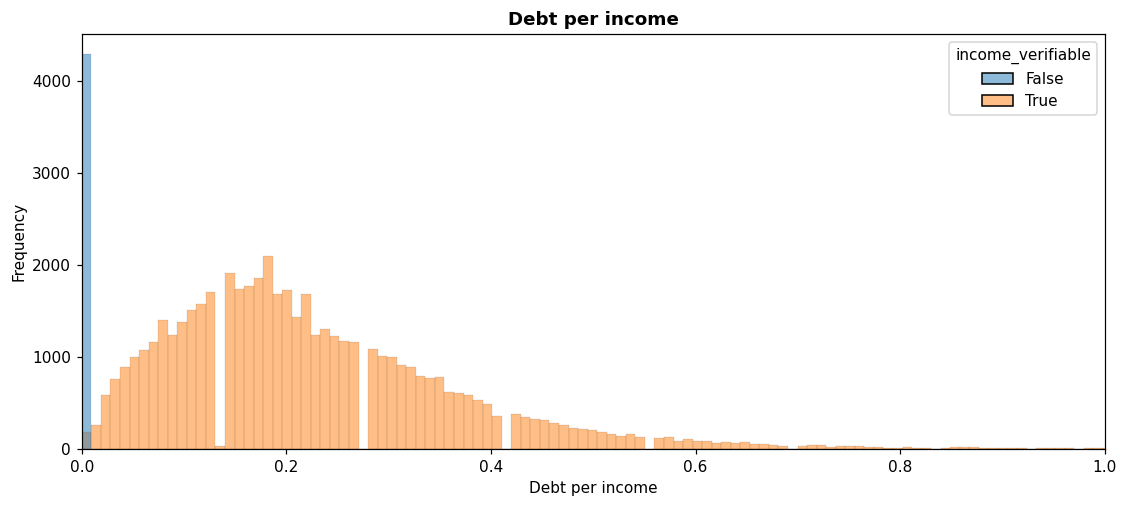

In [26]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 110);
ax=sns.histplot(data=df_history, x=df_history['debt_per_income'], hue='income_verifiable')
plt.xlim(0,1)
plt.title("Debt per income", fontweight='bold');
plt.xlabel("Debt per income");
plt.ylabel("Frequency");

#### How is the relation between loan status, borrow status, debt per income and total prosper loans?

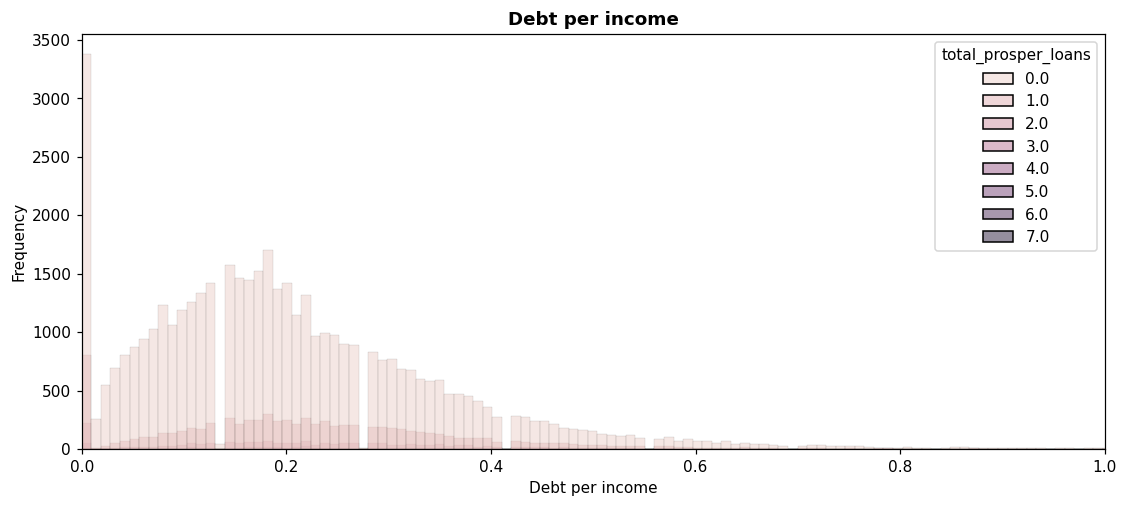

In [27]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 110);
ax=sns.histplot(data=df_history, x=df_history['debt_per_income'], hue='total_prosper_loans')
plt.xlim(0,1)
plt.title("Debt per income by total prosper loans", fontweight='bold');
plt.xlabel("Debt per income");
plt.ylabel("Frequency");

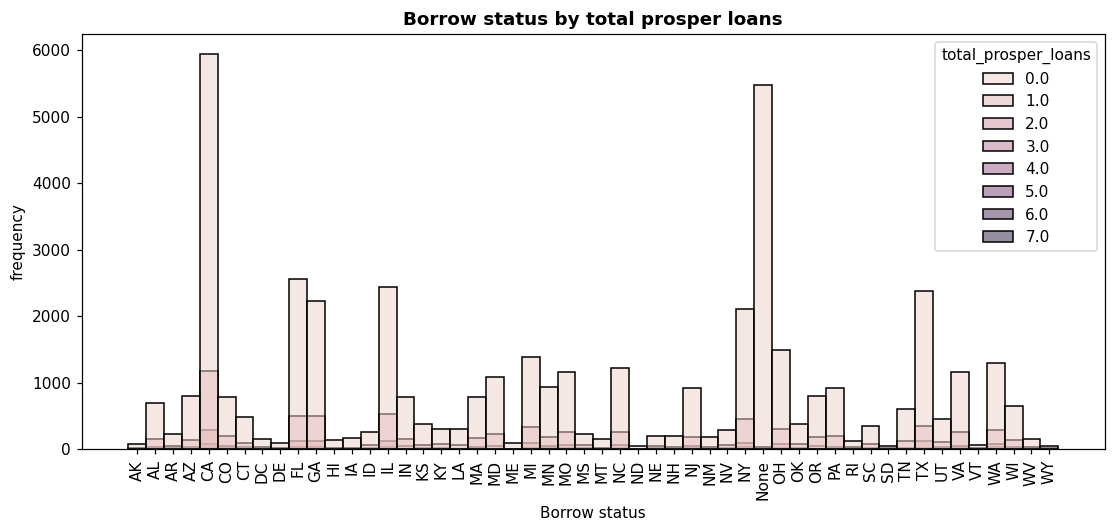

In [28]:
df_history=df_history.sort_values(by=['borrower_state'])
fig, ax = plt.subplots(figsize = (12,5), dpi = 110);
ax=sns.histplot(data=df_history, x=df_history['borrower_state'],  hue='total_prosper_loans')
plt.title("Borrow status by total prosper loans", fontweight='bold');
ax.tick_params(axis='x', labelrotation=90)
plt.xlabel("Borrow status");
plt.ylabel("frequency");

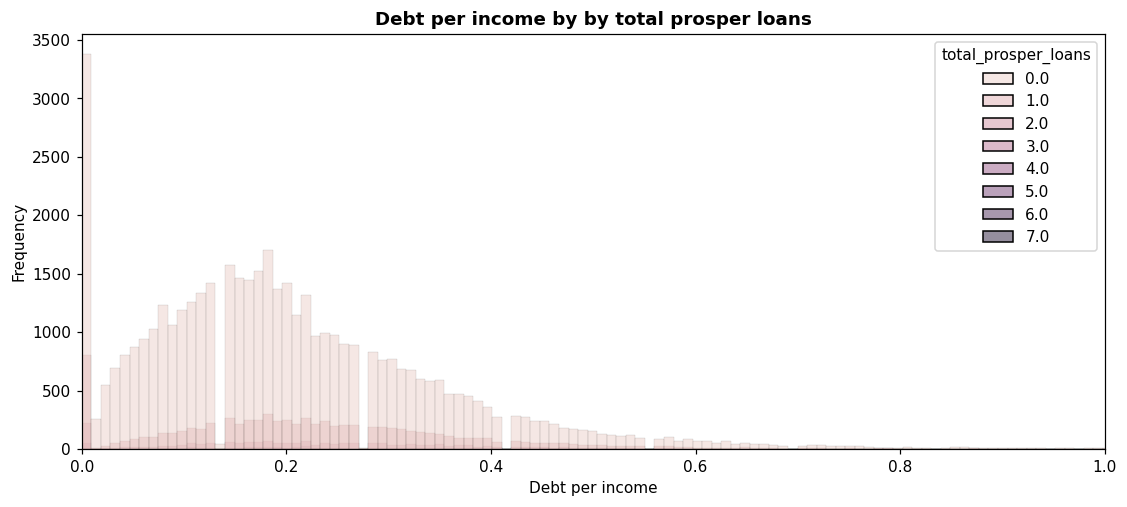

In [29]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 110);
ax=sns.histplot(data=df_history, x=df_history['debt_per_income'], hue='total_prosper_loans')
plt.xlim(0,1)
plt.title("Debt per income by by total prosper loans", fontweight='bold');
plt.xlabel("Debt per income");
plt.ylabel("Frequency");

In conclusion, because completed status has large unverifiable earnings, the status of the loan is unaffected by verifiable income or the debt to income ratio. Past due bars are obviously not unverifiable sources of money. Therefore, we must verify past-due loan repayment and thoroughly investigate any consumers whose revenues are disputed.